# Mini Project 1
##### by Jacynn

## Red Wine Rating & Price

This dataset contains the general information of each unique red wine and the rating by Vivino users. 

Vivino is the world’s largest wine app and marketplace empowering people everywhere to enjoy wine to the fullest. Vivino provides wine drinkers access to unbiased information about wine from a community of millions.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Data Exploration and Cleaning

In [2]:
red=pd.read_csv('Red.csv')
red.head() 
#No of rating=number of people rated

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [3]:
red.shape

(8666, 8)

In [4]:
red.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64

In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


In [6]:
red['Year'].value_counts()

2016    1776
2017    1558
2015    1396
2018    1099
2014     798
2013     564
2012     371
2011     278
2010     174
2005     154
2019     116
2009      84
2008      80
2006      44
2007      43
2004      27
2000      19
1999      15
2001      12
2003      11
N.V.       8
1997       7
2002       7
1998       6
1996       5
1995       4
1992       3
1990       2
1989       2
1993       1
1988       1
1991       1
Name: Year, dtype: int64

In [7]:
red['Year'] = red['Year'].replace('N.V.', np.NaN)
red['Year'] = pd.to_numeric(red['Year'])

In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8658 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 541.8+ KB


In [9]:
red.describe()

,Rating,NumberOfRatings,Price,Year
count,8666.000000,8666.000000,8666.000000,8658.000000
mean,3.890342,415.287445,39.145065,2014.818434
std,0.308548,899.726373,84.936307,3.281252
min,2.500000,25.000000,3.550000,1988.000000
25%,3.700000,66.000000,10.680000,2014.000000
50%,3.900000,157.000000,18.200000,2016.000000
75%,4.100000,401.000000,38.142500,2017.000000
max,4.800000,20293.000000,3410.790000,2019.000000


In [10]:
red.corr()

,Rating,NumberOfRatings,Price,Year
Rating,1.000000,0.075216,0.451060,-0.343491
NumberOfRatings,0.075216,1.000000,0.006407,-0.025555
Price,0.451060,0.006407,1.000000,-0.363914
Year,-0.343491,-0.025555,-0.363914,1.000000


## Data Visualization

### Country

##### Top 10 Produced Wine Count per Country

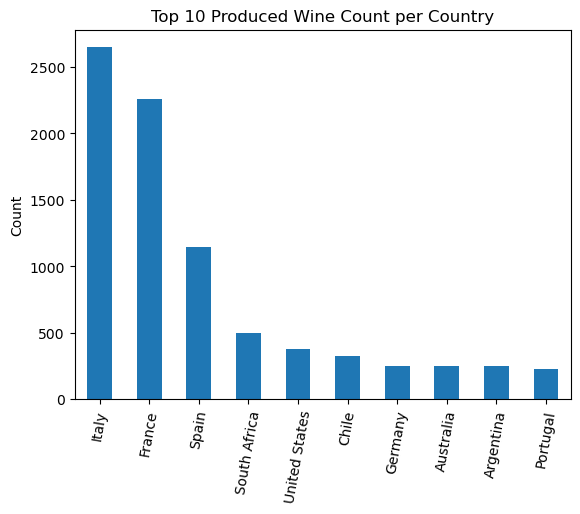

In [11]:
red.Country.value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Top 10 Produced Wine Count per Country')
plt.show()

Italy has the most red wine count in this dataset, following up with France and Spain. They are well-known countries in red wine producing of the old wine world. 

### Year

###### Top 10 Produced Wine Count per Year

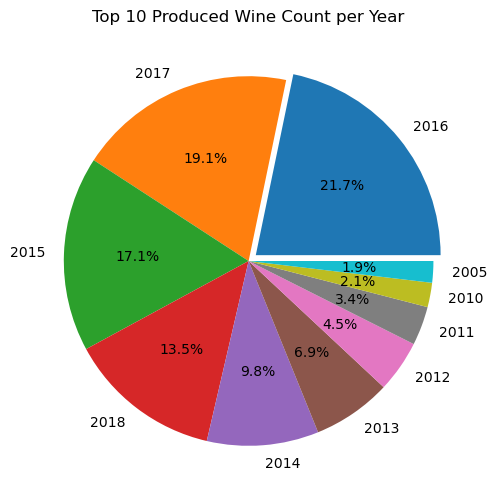

In [31]:
fig = plt.figure(figsize=(6, 6))
labels = ['2016', '2017', '2015', '2018', '2014','2013','2012', '2011', '2010', '2005']
explode = (0.05,0,0,0,0,0,0,0,0,0)
plt.pie(red.Year.value_counts().head(10), autopct='%1.1f%%', shadow=False, explode=explode, labels=labels)
plt.title('Top 10 Produced Wine Count per Year')
plt.show()

Year 2016 has the most produced red wine, followed by 2017 and 2015.

### Rating

##### Produced Wine Count per Rating

In [13]:
rating_df = pd.DataFrame(red.value_counts('Rating')).reset_index()
rating_df

,Rating,0
0,3.8,1171
1,3.9,1044
2,3.7,994
3,4.0,905
4,4.1,887
5,3.6,754
6,4.2,743
7,4.3,483
8,3.5,477
9,4.4,301


In [14]:
rating_df.sort_values(by=['Rating'], ascending=True, inplace=True)

In [29]:
rating_df.rename(columns={0:'Frequency'}, inplace=True)

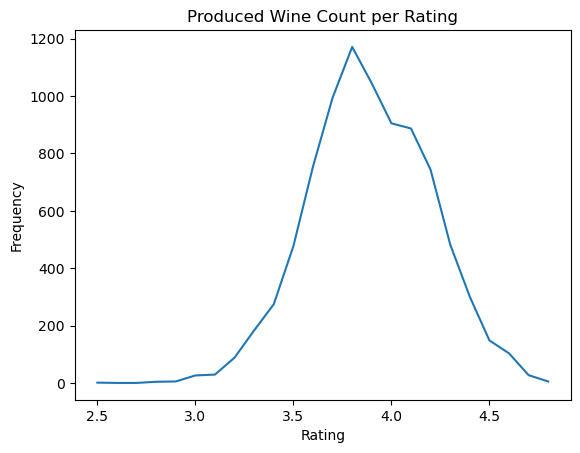

In [30]:
sns.lineplot(data=rating_df, x='Rating', y='Frequency')
plt.title('Produced Wine Count per Rating')
plt.show()

Most of the wine are rated between 3.6 to 4.2 out of 5, with a peak on the rating 3.8.

##### Top Rating Red Wine

In [17]:
red[(red['Rating'] == 4.8)]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
951,Barolo Riserva Monfortino 2013,Italy,Barolo,Giacomo Conterno,4.8,132,1115.50,2013.0
3420,G 2015,South Africa,Western Cape,4G Wine Estate,4.8,28,463.03,2015.0
3747,Beckstoffer Las Piedras Vineyard Cabernet Sauv...,United States,St. Helena,Paul Hobbs,4.8,30,368.47,2015.0
4031,L'Ermita Velles Vinyes Priorat 2008,Spain,Priorat,Álvaro Palacios,4.8,32,672.60,2008.0
8073,Toscana 2016,Italy,Toscana,Masseto,4.8,85,960.17,2016.0
8086,Veneto Alzero Cabernet 2009,Italy,Veneto,Quintarelli Giuseppe,4.8,85,324.95,2009.0


##### Least Rating Red Wine

In [18]:
red[(red['Rating'] == 2.5)]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
4998,Cabernet Sauvignon 2016,France,Pays d'Oc,Fortant,2.5,40,8.29,2016.0
6335,Cabernet Sauvignon 2018,South Africa,Cape Town,Cape Town Wine Co,2.5,55,7.50,2018.0


### Price

##### Top 10 Pricey Wine

In [19]:
red.sort_values('Price', ascending=False).head(10)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
2344,Pomerol 2012,France,Pomerol,Pétrus,4.7,204,3410.79,2012.0
7466,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,Château Ausone,4.5,72,1599.95,2010.0
5560,Pauillac (Premier Grand Cru Classé) 2010,France,Pauillac,Château Lafite Rothschild,4.4,457,1399.00,2010.0
4395,Pauillac (Premier Grand Cru Classé) 1992,France,Pauillac,Château Lafite Rothschild,4.5,346,1266.25,1992.0
4124,Pessac-Léognan (Premier Grand Cru Classé) 2010,France,Pessac-Léognan,Château Haut-Brion,4.6,327,1197.90,2010.0
2703,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,Château Cheval Blanc,4.6,233,1190.00,2010.0
2378,Pauillac (Premier Grand Cru Classé) 1989,France,Pauillac,Château Mouton Rothschild,4.6,2069,1168.77,1989.0
951,Barolo Riserva Monfortino 2013,Italy,Barolo,Giacomo Conterno,4.8,132,1115.50,2013.0
8056,Pauillac (Premier Grand Cru Classé) 1992,France,Pauillac,Château Mouton Rothschild,4.4,840,1071.29,1992.0
1804,Pauillac (Premier Grand Cru Classé) 1993,France,Pauillac,Château Mouton Rothschild,4.5,1717,1051.80,1993.0


Most of the pricey wine are from France, with rating more than 4.4 and aged. Only a wine from Italy has the highest rating 4.8 out of 5. 

##### Top 10 Cheap Wine

In [20]:
red.sort_values('Price', ascending=False).tail(10)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
4675,Feudi d'Albe Montepulciano d'Abruzzo 2017,Italy,Montepulciano d'Abruzzo,Bove,3.5,37,4.30,2017.0
6127,Primo Sangiovese - Merlot 2018,Italy,Daunia,Farnese,3.5,52,4.28,2018.0
4033,Cabernet Sauvignon 2018,Chile,Central Valley,Sierra Noble,3.8,32,4.25,2018.0
1057,Tempranillo 2015,Spain,Castilla,Maximo,3.4,137,4.16,2015.0
6869,Monterio Tempranillo 2016,Spain,La Mancha,Bodegas Victorianas,3.2,622,3.99,2016.0
7821,Tempranillo Cariñena 2018,Spain,Cariñena,Marques de Villanueva,3.7,79,3.99,2018.0
108,Cabernet - Shiraz 2016,Spain,La Mancha,Añoranza,3.4,103,3.95,2016.0
6408,Nero d'Avola 2018,Italy,Terre Siciliane,Monte Pietroso,3.8,56,3.79,2018.0
2938,Cal Y Canto Full Red 2018,Spain,La Mancha,Isidro Milagro,3.1,25,3.70,2018.0
5423,Shiraz 2018,Spain,Castilla,Costa Azul,3.2,44,3.55,2018.0


Cheaper wine are mainly from Spain, with rating lower than 3.8 and considered young wine.

### What is the relationship between rating and price?

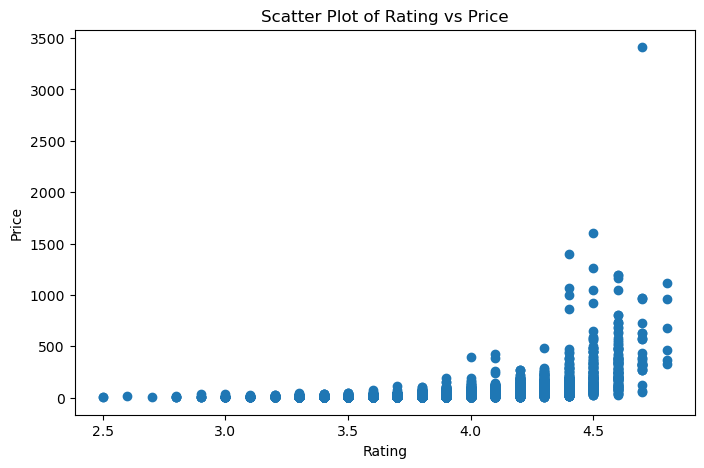

In [21]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(red.Rating, red.Price)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Scatter Plot of Rating vs Price')
plt.show()

The correlation between rating and price is relatively low. However, it does show that the higher the rating, the higher the price of wine can be.

### Which country has the higher wine price in average?

In [22]:
red_mean=red.groupby('Country').mean()
red_mean

,Rating,NumberOfRatings,Price,Year
Country,,,,
Argentina,3.829268,907.524390,22.374024,2016.369919
Australia,3.843089,392.544715,41.008415,2015.752033
Austria,3.799545,124.904545,21.499682,2016.004545
Brazil,3.502500,553.525000,18.703000,2012.375000
Bulgaria,3.800000,449.000000,10.150000,2015.500000
Canada,3.300000,48.000000,14.950000,2016.000000
Chile,3.769325,643.947853,21.492883,2016.049231
China,2.900000,235.000000,35.000000,2016.000000
Croatia,4.100000,95.000000,21.400000,2015.500000


In [23]:
red_mean.reset_index(inplace=True)

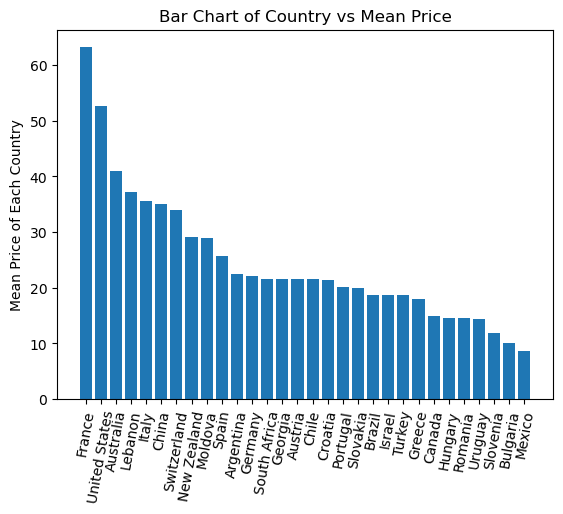

In [24]:
price_sort = red_mean.sort_values(by=['Price'], ascending=False)

#Graph
plt.bar(price_sort['Country'], price_sort['Price'])
plt.xticks(rotation=80)
plt.ylabel('Mean Price of Each Country')
plt.title('Bar Chart of Country vs Mean Price')
plt.show()

In average, France has the highest wine price, following by US and Australia.

### Which country has the higher wine rating in average?

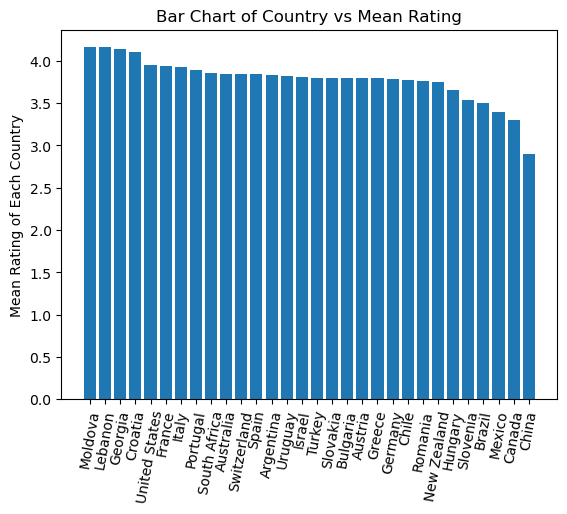

In [33]:
rating_sort = red_mean.sort_values(by=['Rating'], ascending=False)

#Graph
plt.bar(rating_sort['Country'], rating_sort['Rating'])
plt.xticks(rotation=80)
plt.ylabel('Mean Rating of Each Country')
plt.title('Bar Chart of Country vs Mean Rating')
plt.show()

Surprisingly, rather than France or Italy, the popular country of red wine, Moldova has the highest mean rating. This may be affected by the wine count of each country, fluctuating the mean price. 

### Conclusion:

The price of a red wine can be affected by the produced country and produced year. Expensive wine does not necessarily have a higher rating, but a high rating wine does cost.



#### Reference: 
https://www.kaggle.com/datasets/budnyak/wine-rating-and-price.